# Pymaceuticals Inc.
---

### Analysis

- From my analysis, we can see that Capomulin has the highest number of mice in this study and capomulin might be more common in cancer treatment study in mice.
- Also there is a positive correlation between mouse weight and average tumor volume.
- Based on the study, it indicates heavier the mouse = larger tumor so and may require more dosage of Capomulin comparing to the lighter mice
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

#print(mouse_metadata.head())
#print(study_results.head())
merge_df = pd.merge(mouse_metadata, study_results, how= 'right')

# Display the data table for preview
merge_df = merge_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen',
                    'Sex', 'Age_months', 'Weight (g)']]
print(merge_df.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [39]:
# Checking the number of mice
total_mouse = len(merge_df["Mouse ID"].value_counts())
print("Total mouse id:", total_mouse)

Total mouse id: 249


In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice['Mouse ID'].unique())


['g989']


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
all_duplicate_data = merge_df[merge_df["Mouse ID"].isin(duplicate_mice["Mouse ID"].unique())]

# Print the result
print("All data for the duplicate mice:", all_duplicate_data)


All data for the duplicate mice:      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989      

In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')


In [43]:

# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].value_counts()
clean_mouse_count = len(clean_mouse_count)
print(f"Number of mice in the clean DataFrame: {clean_mouse_count}")


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [44]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


grouped_data = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_vol = grouped_data.mean()
#print(mean_vol)
median_vol = grouped_data.median()
#print(median_vol)
variance = grouped_data.var()
#print (variance)
st_dev = grouped_data.std()
#print (st_dev)
sem_vol = grouped_data.sem()
#print(sem_vol)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame ({ "Mean Tumor Volume" : mean_vol,
                               "Median Tumor Volume" : median_vol,
                               "Tumor volume varience" : variance,
                               "Tumor volume standard deviation" : st_dev,
                               "Tumor volume SEM" : sem_vol
    
})

# Assemble the resulting series into a single summary DataFrame.

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor volume varience,Tumor volume standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
grouped_data = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = pd.DataFrame ({ "Mean Tumor Volume" : mean_vol,
                               "Median Tumor Volume" : median_vol,
                               "Tumor volume varience" : variance,
                               "Tumor volume standard deviation" : st_dev,
                               "Tumor volume SEM" : sem_vol })
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor volume varience,Tumor volume standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

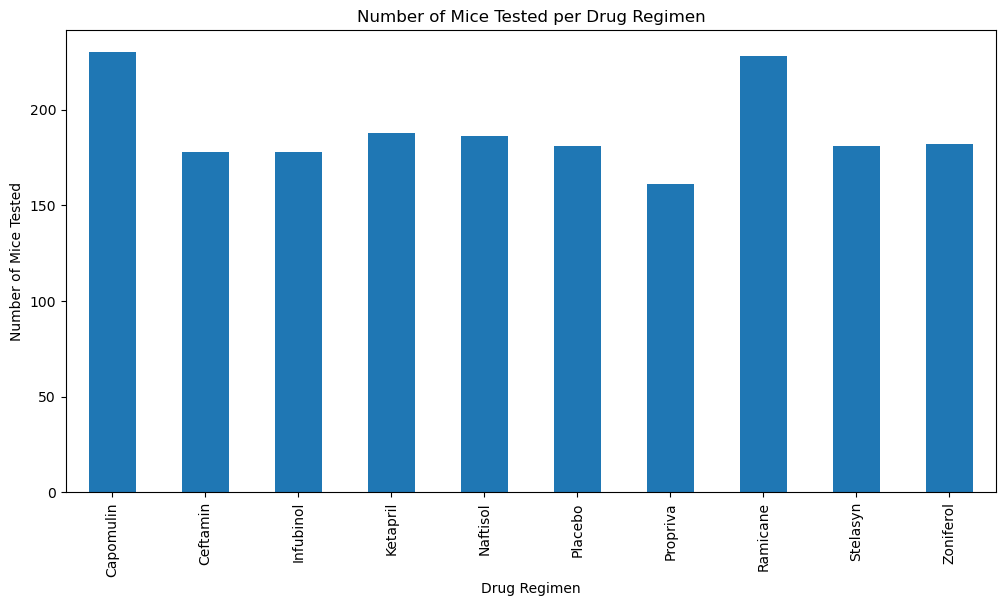

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_data = merge_df.groupby('Drug Regimen')["Mouse ID"].count()
grouped_data.plot(kind='bar', figsize=(12,6))
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


TypeError: 'tuple' object is not callable

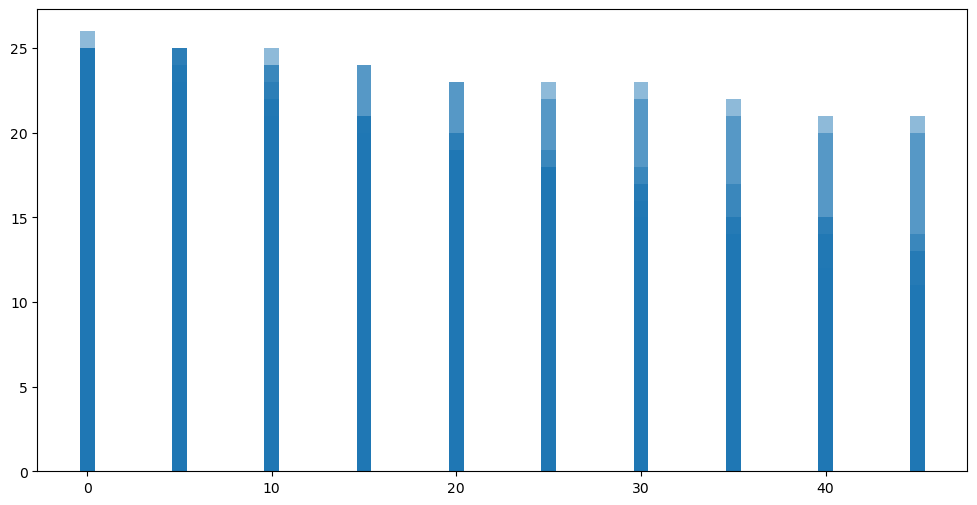

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
grouped_data =merge_df.groupby(['Drug Regimen', 'Timepoint'])['Mouse ID'].count().reset_index()

plt.figure(figsize=(12,6))

plt.bar(grouped_data['Timepoint'],grouped_data['Mouse ID'], alpha=0.5, align='center')
plt.xticks(grouped_data['Timepoint'], rotation ='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()


<AxesSubplot:ylabel='Sex'>

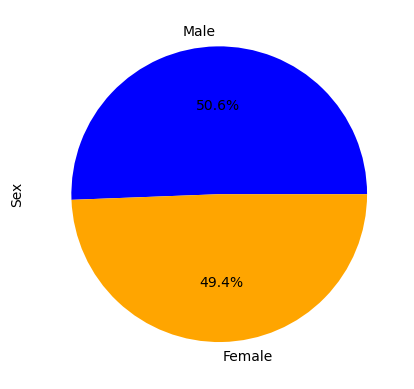

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = merge_df['Sex'].value_counts()
gender_count.plot(kind='pie',autopct="%1.1f%%",
labels = ["Male", "Female"],
colors = ['blue', 'orange'])

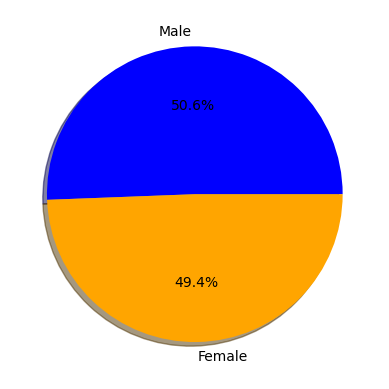

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = merge_df['Sex'].value_counts()
labels = ["Male", "Female"]
colors = ['blue', 'orange']
plt.pie(gender_count, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_lists = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments = merge_df[merge_df['Drug Regimen'].isin(treatment_lists)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints =merge_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_timepoints.reset_index().merge(treatments, on=['Mouse ID','Timepoint'], how='left')
merged_data = merge_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume'})
merged_data


,Mouse ID,Timepoint,Final Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_lists = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment and calculate the IQR and quantitatively determine if there are any potential outliers.
for i, treatment in enumerate(treatment_lists):
    tumor_volumes = merge_df.loc[merge_df["Drug Regimen"] == treatment]['Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
 
    print(f"The lower quartile of {treatment} is: {lower_quartile}")
    print(f"The upper quartile of {treatment} treatments is: {upper_quartile}")
    print(f"The interquartile range of {treatment} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {treatment} outliers.")
    print(f"Values above {upper_bound} could be {treatment} outliers.")
    if outliers.any():
        print(f"Outliers for {treatment}: {outliers.tolist()}")
    else:
        print(f"No outliers for {treatment}")



The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin treatments is: 45.0
The interquartile range of Capomulin treatments is: 7.314067135000002
Values below 26.714832162499995 could be Capomulin outliers.
Values above 55.9711007025 could be Capomulin outliers.
Outliers for Capomulin: [25.47214326, 23.34359787]
The lower quartile of Ramicane is: 36.674634585
The upper quartile of Ramicane treatments is: 45.0
The interquartile range of Ramicane treatments is: 8.325365415
Values below 24.1865864625 could be Ramicane outliers.
Values above 57.488048122500004 could be Ramicane outliers.
Outliers for Ramicane: [22.05012627]
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol treatments is: 57.314443967500004
The interquartile range of Infubinol treatments is: 10.002090667500006
Values below 32.309217298749985 could be Infubinol outliers.
Values above 72.31757996875001 could be Infubinol outliers.
No outliers for Infubinol
The lower quarti

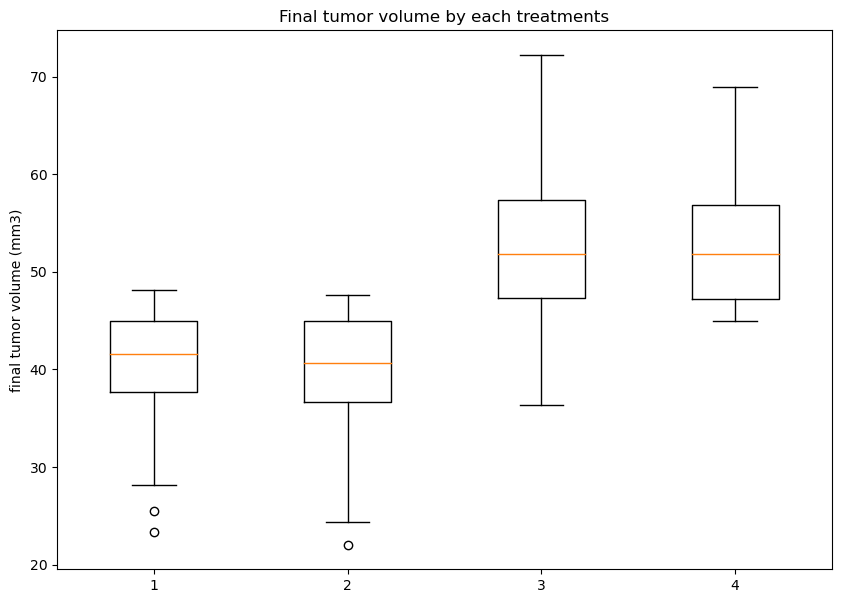

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_plot = [tumor_vol_data[0], tumor_vol_data[1], tumor_vol_data[2], tumor_vol_data[3]]

fig =plt.figure(figsize=(10,7))
plt.boxplot(data_plot)

plt.xticks =([1,2,3,4], treatment_lists)
plt.ylabel('final tumor volume (mm3)')
plt.title('Final tumor volume by each treatments')
plt.show()

## Line and Scatter Plots

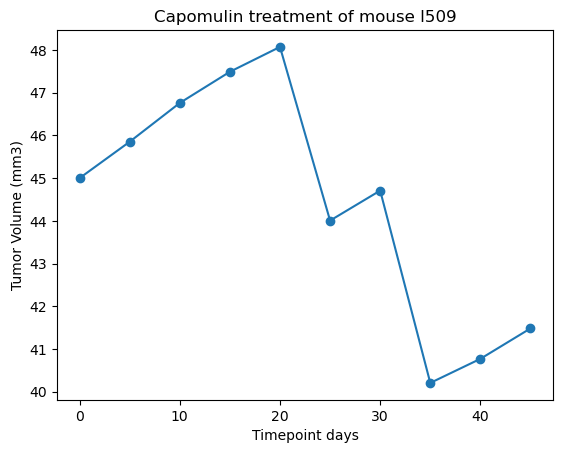

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = merge_df.loc[(merge_df['Drug Regimen'] == 'Capomulin')]
line_df= capomulin_data.loc[capomulin_data['Mouse ID']=='l509',:]
line_df.head()
x_axis = line_df['Timepoint']
y_axis = line_df['Tumor Volume (mm3)']
fig1, ax1= plt.subplots()

plt.plot(x_axis, y_axis, marker='o')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Timepoint days")
plt.title('Capomulin treatment of mouse l509')
plt.show()


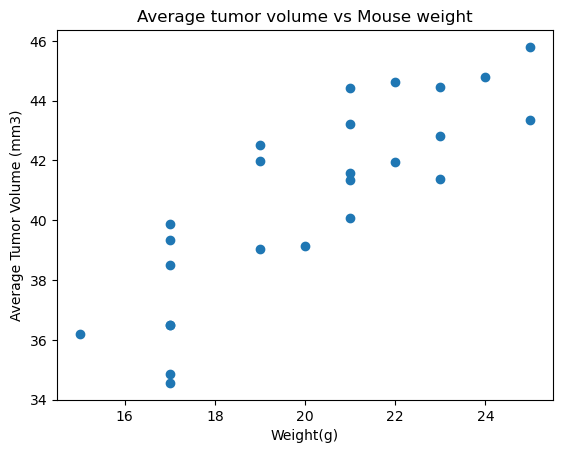

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
average_capomulin = capomulin_data.groupby('Mouse ID').mean()
x_axis =average_capomulin['Weight (g)']
y_axis = average_capomulin['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis)

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel("Weight(g)")
plt.title('Average tumor volume vs Mouse weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


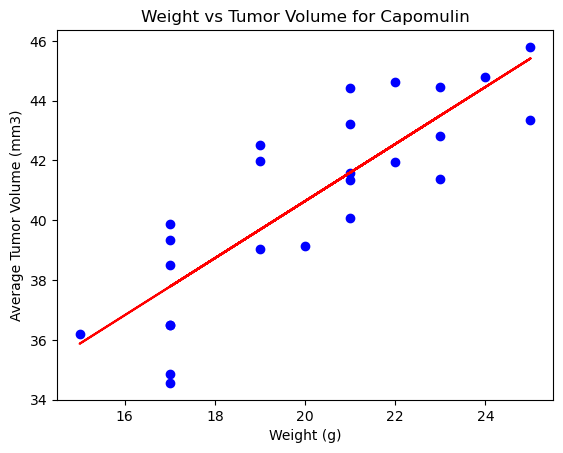

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import pearsonr, linregress

correlation_coefficient = st.pearsonr(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0], 2)}")

slope, intercept, rvalue, pvalue, stderr = linregress(average_capomulin["Weight (g)"], average_capomulin["Tumor Volume (mm3)"])
regress_values = average_capomulin["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'], color='blue')
plt.plot(average_capomulin['Weight (g)'], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

